# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from matplotlib import pyplot as plt
from datetime import datetime

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


640

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [7]:

#cities_test = ["Paris", "London", "Gretel", "Beijing"]
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
name = []
i = 0

#Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if i % 50 == 0:
        time.sleep(5)

    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        i = i + 1
        print(f"recorded {i}: {city}")
        
    except KeyError: 
        print(f"{city} city not found")


#print(response)

#print(f"The latitude is: {lat}")
#print(f"The lon is: {lng}") 
#print(f"The temp is: {temp}") 
#print(f"The max temp is: {max_temp}")
#print(f"The humidity is: {humidity}")
#print(f"The cloudiness is: {cloudiness}")
#print(f"The wind speed is: {wind_speed}")
#print(f"The country is: {country}")
#print(f"The date is: {date}")

recorded 1: cape town
recorded 2: komsomolskiy
recorded 3: hofn
recorded 4: kaitangata
recorded 5: souillac
recorded 6: barrow
grand river south east city not found
recorded 7: bambous virieux
recorded 8: yellowknife
recorded 9: ushuaia
recorded 10: saint-georges
recorded 11: erzin
bokspits city not found
recorded 12: joensuu
recorded 13: kapaa
longlac city not found
recorded 14: guerrero negro
recorded 15: bredasdorp
recorded 16: talnakh
recorded 17: yaya
recorded 18: hobart
recorded 19: lermontovka
recorded 20: geraldton
recorded 21: mandalgovi
recorded 22: vaini
recorded 23: port macquarie
recorded 24: rikitea
tsihombe city not found
recorded 25: ponta do sol
recorded 26: cockburn town
recorded 27: sinnamary
recorded 28: srednekolymsk
illoqqortoormiut city not found
recorded 29: breves
recorded 30: hithadhoo
recorded 31: bethel
recorded 32: zhezkazgan
recorded 33: andenes
meyungs city not found
recorded 34: busselton
recorded 35: albany
recorded 36: waseca
recorded 37: new norfolk
r

paradwip city not found
recorded 315: opuwo
recorded 316: tornio
mrirt city not found
bur gabo city not found
recorded 317: nata
recorded 318: pangody
recorded 319: nizhnevartovsk
recorded 320: lebanon
samusu city not found
recorded 321: beyneu
recorded 322: nevers
recorded 323: manzhouli
recorded 324: saint-pierre
recorded 325: berlevag
recorded 326: kraskino
recorded 327: rio grande
recorded 328: cayenne
recorded 329: dickinson
recorded 330: akyab
recorded 331: sorland
recorded 332: saint-augustin
recorded 333: teguise
recorded 334: chuy
recorded 335: kashi
recorded 336: mersing
recorded 337: mathbaria
chagda city not found
warqla city not found
recorded 338: gat
recorded 339: sawtell
recorded 340: los zacatones
recorded 341: tulagi
recorded 342: sabang
recorded 343: joshimath
recorded 344: constitucion
recorded 345: langxiang
recorded 346: yima
recorded 347: mareeba
recorded 348: esperance
recorded 349: great bend
attawapiskat city not found
recorded 350: novoagansk
recorded 351: ca

To gather my random world wide city data, I used a `.random.uniform` function to pull a set of 575 cities from varying latitudes and longitudes. Once I compiled this list, I ran a `for loop` to gather data on each city’s maximum temperature, humidity percent level, cloudiness percent, and wind speed. I added this information to a `DataFrame` to analyze. Due to limitations in pulling the data, I added `time.sleep()` after every 50 cities pulled in my code so that I would not exceed my limit of data pulls from the OpenWeatherMap API. 

#used test city data and for loop to run through data and record city info. 

In [8]:
#figure out ways to convert time stamp to date
d = datetime.utcfromtimestamp(1602900138)

print(d)

2020-10-17 02:02:18


## Convert Raw Data to DataFrame
* Save as csv

In [9]:
#create dataframe with all weather data. save to csv to work on for rest of project
weather_data_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})


weather_data_df.to_csv(output_data_file, index=False)
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,60.01,62,0,14.99,ZA,1603215618
1,Yangi Marg`ilon,40.43,71.72,57.20,50,0,6.93,UZ,1603215549
2,Hofn,64.25,-15.21,37.51,72,20,4.23,IS,1603215623
3,Kaitangata,-46.28,169.85,48.00,85,98,1.99,NZ,1603215353
4,Souillac,-20.52,57.52,75.20,73,20,11.41,MU,1603215623


In [10]:
#re-add date as CSV file 
file = "../output_data/cities.csv"


cities_df = pd.read_csv(file)
cities_df.head()




,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,60.01,62,0,14.99,ZA,1603215618
1,Yangi Marg`ilon,40.43,71.72,57.20,50,0,6.93,UZ,1603215549
2,Hofn,64.25,-15.21,37.51,72,20,4.23,IS,1603215623
3,Kaitangata,-46.28,169.85,48.00,85,98,1.99,NZ,1603215353
4,Souillac,-20.52,57.52,75.20,73,20,11.41,MU,1603215623


In [11]:
#Date Convert!
from datetime import datetime

#d = datetime.utcfromtimestamp(1602900138)
#print(d)

cities_df['Date'] = pd.to_datetime(cities_df['Date'],unit='s')
cities_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,60.01,62,0,14.99,ZA,2020-10-20 17:40:18
1,Yangi Marg`ilon,40.43,71.72,57.20,50,0,6.93,UZ,2020-10-20 17:39:09
2,Hofn,64.25,-15.21,37.51,72,20,4.23,IS,2020-10-20 17:40:23
3,Kaitangata,-46.28,169.85,48.00,85,98,1.99,NZ,2020-10-20 17:35:53
4,Souillac,-20.52,57.52,75.20,73,20,11.41,MU,2020-10-20 17:40:23


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

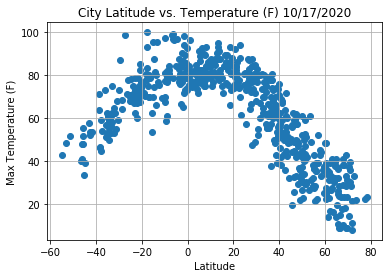

In [12]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Temperature (F) 10/17/2020")
plt.grid()

plt.savefig('../output_data/lat_temp.png')
plt.show()


I then used the `py.plt` function to show my data in scatter plots below. 

Within my data set of 575 random cities all over the world, there is a correlation between the city’s Latitude with the temperature. As the city becomes closer to the equator (latitude of 0°) the temperature increases. As the city locations move farther away from the equator, the temperature decreases. My data set has more data for the Northern Hemisphere and the coldest max temperatures can be found at a latitude location of 80°. 


City Latitude vs. Temperature (F) 10/17/2020 - used pyplot to make scatter plit. Temp is lower the farther from eqauter. 

### Latitude vs. Humidity Plot

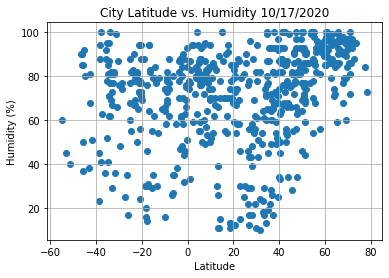

In [13]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 10/17/2020")
plt.grid()

plt.savefig('../output_data/humidity.png')
plt.show()


Although humidity can be high at all Latitude locations, at the equator it is consistently high and there is no data to suggest low humidity near 0° latitude. 

### Latitude vs. Cloudiness Plot

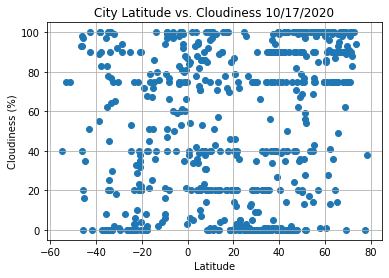

In [14]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 10/17/2020")
plt.grid()

plt.savefig('../output_data/cloudiness.png')
plt.show()


There appears to be no real correlation to of Cloudiness to latitude accept that at the equator, like humidity, there appears to always be a percent of cloud formation.

### Latitude vs. Wind Speed Plot

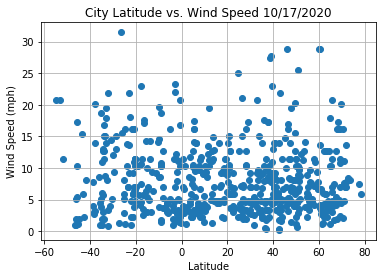

In [15]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 10/17/2020")
plt.grid()

plt.savefig('../output_data/wind_speed.png')
plt.show()


There is no correlation between wind speed and latitude. There are some outlying data points in the upper norther hemisphere. 

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
# #x_values = (cities_df[])
# #y_values = (cities_df[])

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# # plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# # plt.xlabel("")
# # plt.ylabel("")
# # plt.title("")

# plt.show()

When reviewing the data by hemisphere, the same correlations can be seen as above. On these plots I have illustrated the results further with line regression as well as the equation of the line. To calculate line regression and line equation, I used the following code: 

`(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)`

`regress_values = x_values * slope + intercept`

`line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) ‘


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8878719377946399


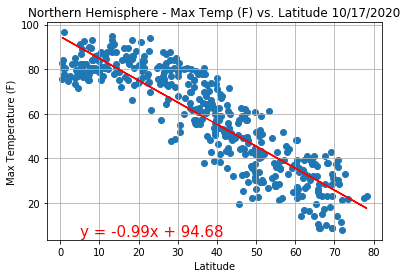

In [16]:
north_lat = cities_df.loc[(cities_df['Latitude'] > 0)]
#north_lat.head()


x_values = (north_lat["Latitude"])
y_values = (north_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/north_lat_temp.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7722571859254783


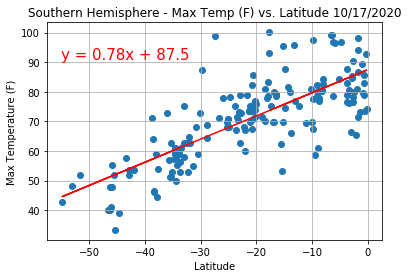

In [17]:
south_lat = cities_df.loc[(cities_df['Latitude'] < 0)]
#south_lat.head()


x_values = (south_lat["Latitude"])
y_values = (south_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,91),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/south_lat_temp.png')
print(f"The r value is: {rvalue}")
plt.show()



In the Northern Hemisphere and Southern Hemisphere, there is a direct correlation of temperature increase as you get closer to the equator, latitude 0°. These scatter plots show a negative line regression in the Northern Hemisphere and a positive line regression in the Southern Hemisphere. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.3071282379074264


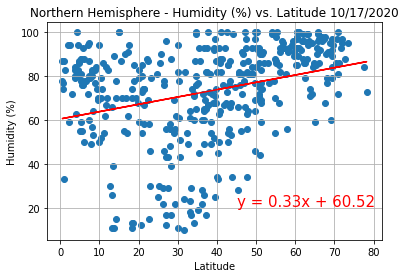

In [18]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/north_humidity.png')
print(f"The r value is: {rvalue}")
plt.show()



Humidity percentage has a positive line regression in both the Northern and Southern Hemisphere. These plots also illustrate that there is only High Humidity percentage at 0° latitude.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.060624104354439885


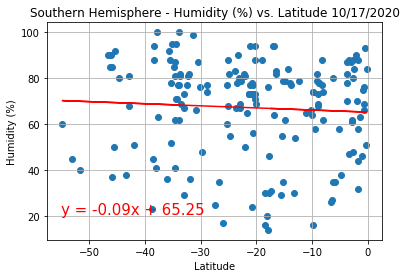

In [19]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/south_humidity.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.3167219511712813


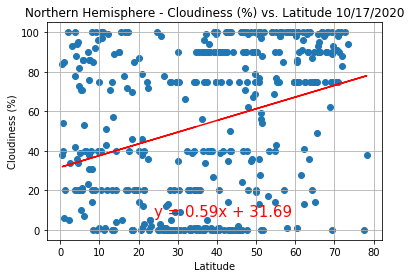

In [20]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(24,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/north_cloudiness.png')
print(f"The r value is: {rvalue}")
plt.show()



Although the line regression value is greater in the Northern Hemisphere, there is no visible correlation between latitude and cloudiness in the Northern Hemisphere and the southern Hemisphere. 

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.16438967545178051


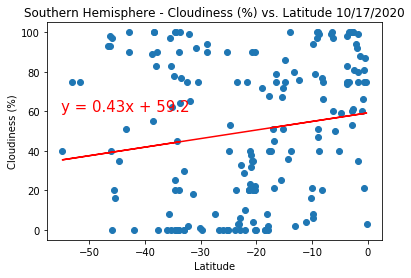

In [21]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude 10/17/2020")

plt.grid
plt.savefig('../output_data/south_cloudiness.png')
print(f"The r value is: {rvalue}")
plt.show()


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.05828245665218739


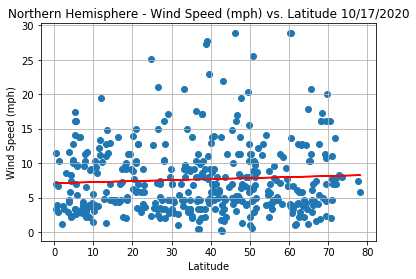

In [22]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,31),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/north_wind.png')
print(f"The r value is: {rvalue}")
plt.show()


There is no correlation between wind speed and latitude location. There is a positive line regression in the Northern Hemisphere and a negative line regression in the Southern Hemisphere. 

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.07578846871461868


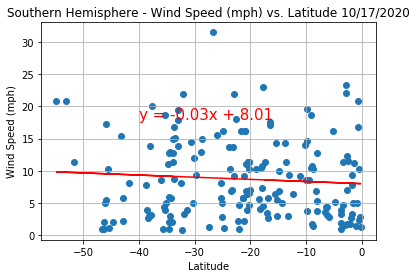

In [23]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-40,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude 10/17/2020")

plt.grid()
plt.savefig('../output_data/south_wind.png')
print(f"The r value is: {rvalue}")
plt.show()



In conclusion, there is a correlation of weather trends as you get closer and farther away from the equator.  The weather is warmer and more humid the closer you are to the equator. There is not a noticeable correlation between wind speed and cloudiness as you move closer and farther from the equator. The results from the Northern and Southern Hemisphere illustrate the same conclusions. 